<a href="https://colab.research.google.com/github/eng-aomar/Security_in_practice/blob/main/security_in_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving secuirtyInPractice.xlsx to secuirtyInPractice.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_responses= pd.read_excel('secuirtyInPractice.xlsx')
df_responses

,Timestamp,gender,years of experience,qualification degree,Specialization,job title,IT Team Size,sector you work,self-rate security knowledge,Apply Software Requirements,Apply Data Classification Scheme,Apply Threat Modeling,Document Technical Stack,Apply Secure Coding Standards,Perform Security Testing,Perform Penetration Testing,Perform Security Review,Publish Operations Guide,Track Vulnerabilities,Improve Development Process,Perform Security Training,development methodology used in your project,type development you do,main priorities when doing development,Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟,security fit in your priorities,"Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإجابة بنعم ، فما هي الأدوات التي تستخدمها؟ وفي أي مرحلة من مراحل تطوير البرمجيات؟"
0,2021-03-31 22:17:59.007,Female,4,Master,Software engineering,Junior developer,3,Private Sector القطاع الخاض,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Once in the Project,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Agile,Web Development,Quality,No,Top priority,No
1,2021-03-31 23:29:12.086,Female,3,Bachelor,Computer engineering,Programmer,5,Educational Organization المؤسسات التعليمية,1,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Agile,Web Development,Understand the gathered requirements and prior...,i try to deliver the most priority requirement...,I always focus on making sure that the systems...,No
2,2021-04-01 22:01:45.978,Female,6,Bachelor,Computer engineering,software developer,5,Private Sector القطاع الخاض,3,Daily,Weekly,Monthly,Once in the Project,Weekly,Monthly,Quarterly,Quarterly,Quarterly,Quarterly,Monthly,Monthly,Scrum,Application Development,task done correctly from all aspects,yes,where ever needed,all stages
3,2021-04-01 22:03:43.996,Female,8,Bachelor,Software engineering,Senior Software Engineer,3,Private Sector القطاع الخاض,2,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Scrum,Web Development,To meet the requested functionality,No,It depends on the request,Using https in servers communicatios and encry...
4,2021-04-01 22:15:15.527,Female,6,Bachelor,Software engineering,Software Engineer,4,Private Sector القطاع الخاض,3,Once in the Project,Quarterly,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Annually,Not Applicable,Not Applicable,Not Applicable,Annually,Not Applicable,Scrum,Web Development,Build functionalities Without bugs.,No,It is the last priority specially when a deadl...,No
5,2021-04-01 22:29:35.029,Female,5,Master,Computer science,programmer,1,Public Sector القطاع الحكومي,3,Once in the Project,Monthly,Monthly,Once in the Project,Monthly,Monthly,Monthly,Weekly,Monthly,Monthly,Weekly,Weekly,Agile,"Web Development, Web services","security, system performance, usability",No,for ensure that software continues to function...,"sql injections, data encryption, input fitters"
6,2021-04-01 22:31:32.432,Female,10,Bachelor,Computer engineering,Sw team leader,7,Private Sector القطاع الخاض,3,Weekly,Not Applicable,Quarterly,Quarterly,Quarterly,Weekly,Weekly,Quarterly,Once in the Project,Daily,Weekly,Not Applicable,Agile,Automation testing,"Coverage of all test cases , performance and ...",Yes,As automation qa tester it’s important to chec...,Part of our testing is to check the security o...
7,2021-04-01 23:16:16.168,Male,15,Master,Software engineering,Software engineer,10,Private Sector القطاع الخاض,4,Once in the Project,Not Applicable,Once in the Project,Not Applicable,Daily,Monthly,Quarterly,Once in the Project,Once in t

In [ ]:
df_responses.columns


Index(['Timestamp', 'gender', ' years of experience', 'qualification degree',
       ' Specialization', ' job title', 'IT Team Size', ' sector you work',
       'self-rate security knowledge', 'Apply Software Requirements',
       'Apply Data Classification Scheme', 'Apply Threat Modeling',
       'Document Technical Stack', 'Apply Secure Coding Standards',
       'Perform Security Testing', 'Perform Penetration Testing',
       'Perform Security Review', 'Publish Operations Guide',
       'Track Vulnerabilities', 'Improve Development Process',
       'Perform Security Training',
       'development methodology used in your project',
       'type development  you do', 'main priorities when doing development',
       'Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟',
       'security fit in your priorities',
       'Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإج

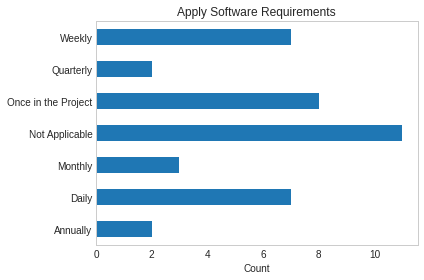

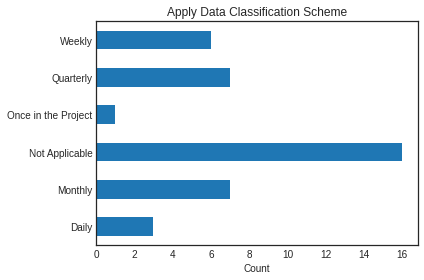

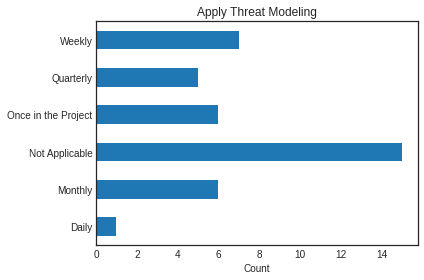

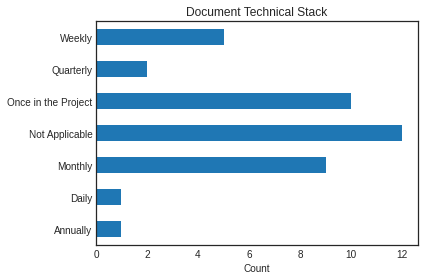

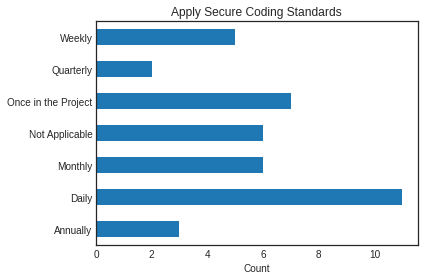

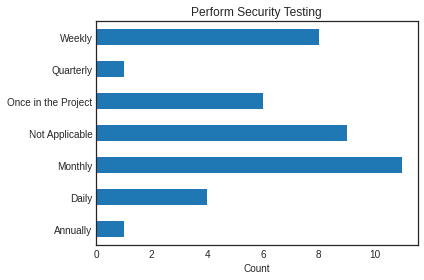

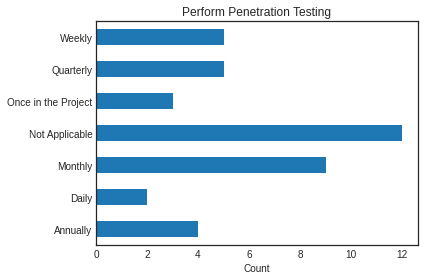

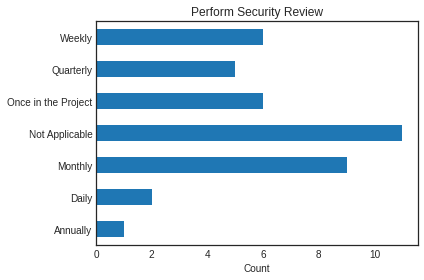

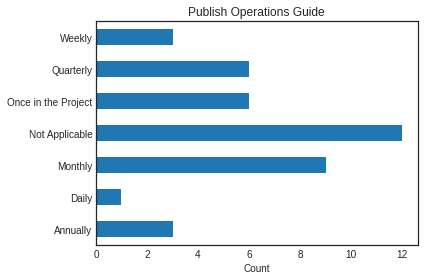

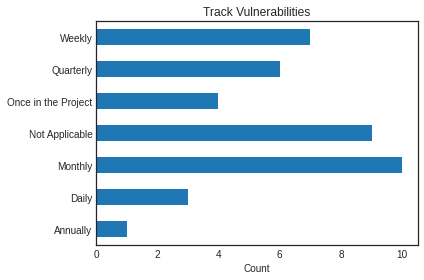

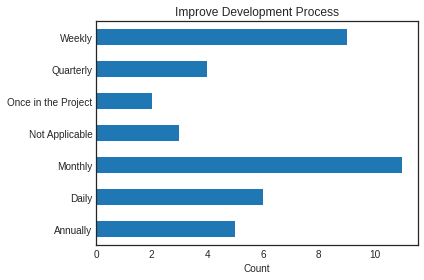

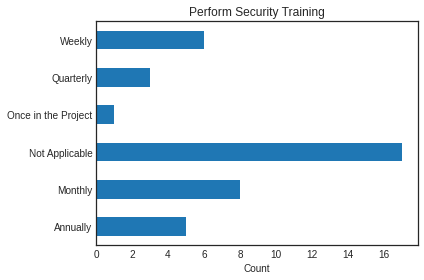

In [ ]:
df_new =df_responses.iloc[:,9:21]
image_format = 'svg' # e.g .png, .svg, etc.
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
for col in df_new:
    ax = df_new[col].value_counts().sort_index().plot.barh(title=col)
    plt.xlabel('Count')
    plt.tight_layout() # to get full text labels when saving the figures
    plt.show()
    image_name= col +'.svg'

    fig.savefig(image_name, format=image_format, dpi=1200)